In [1]:
import sympy as sym
%matplotlib inline
sym.init_printing()

import matplotlib.pyplot as plt
from sympy.plotting.plot import MatplotlibBackend

def logx_plot(Hw, wrange, **kwargs):
    'create plot with logarithmic x-axis'
    p = sym.plot(Hw, wrange, show=False, **kwargs)
    backend = MatplotlibBackend(p)
    backend.process_series()
    #backend.ax[0].spines['left'].set_position(('axes', 0))
    #backend.ax[0].spines['bottom'].set_position(('axes', 0))
    plt.xscale('log')
    plt.grid(which='both')

def db(x):
    'compute dB value'
    return 20 * sym.log(sym.Abs(x), 10)

# Caracterización de Sistemas en Dominio de la Frecuencia


## Función de Transferencia

Hay distintas representaciones para modelar sistemas LTI. Algunas de estas son:
- Los coeficientes constantes de las Ecuaciones Diferenciales(ODEs).
- La [respuesta impulsional].
- La [respuesta al escalón]. 

La [Función de transferencia] usa la forma $e^{s t}$ como eigenfunción para establecer combinaciones de $e^{s t}$ al ser excitado un sistema LTI. Se usa la transformada de Laplace para esta representación.

### Respuesta al Impulso y Señales de Entrada y Salida

La operación de convolución en el dominio temporal tiene equivalencia en el dominio de la frecuencia.



En el dominio temporal, la salida $y(t)$ de un sistema LTI está dada por la convolución entre la entrada $x(t)$ y la [respuesta al impulso](../systems_time_domain/impulse_response.ipynb) $h(t)$.

\begin{equation}
y(t) = x(t) * h(t)
\end{equation}

En el dominio transformado se tiene

\begin{equation}
Y(s) = X(s) \cdot H(s)
\end{equation}

donde $X(s) = \mathcal{L} \{ x(t) \}$ y $Y(s) = \mathcal{L} \{ y(t) \}$ son las transformadas de Laplace de las señales de entrada y salida.

La función de transferencia $H(s)$ está dada por la transformada de Laplace de la respuesta al impulso $h(t)$

\begin{equation}
H(s) = \mathcal{L} \{ h(t) \}
\end{equation}

Así, un sistema LTI queda caracterizado mediante la respuesta impulsional en el dominio temporal y en el dominio frecuencial.

Note también que puede encontrarse la función de transferencia como el cociente entre las señales de salida $Y(s)$ y  $X(s)$ en el dominio de Laplace.

\begin{equation}
H(s) = \frac{Y(s)}{X(s)}
\end{equation}

O como el cociente entre las señales de salida $Y(\omega)$ y  $X(\omega)$ en el dominio de Fourier.

\begin{equation}
H(\omega) = \frac{Y(\omega)}{X(\omega)}
\end{equation}

En cuanto a señales:

- La transformada de Laplace permite analizar formas transitorias y estáticas de las señales.
- La transformada de Fourier permite analizar solamente formas estáticas de las señales oscilatorias, composición espectral.



En cuanto a sistemas:
- La transformada de Laplace permite analizar comportamientos transitorios y estáticos de los sistemas ante cualquier señal de entrada.
- La transformada de Fourier permite analizar solamente la respuesta de los sistemas anre excitaciones oscilatorias, respuesta frecuencial.

Escoger una u otra transformada depende de la aplicación.

Puede obtener la respuesta frecuencial de un sistema modelado como función de transferencia de Laplace con la equivalencia $s = j\omega$.


### Función de Transferencia y Ecuaciones Diferenciales

Suponga una ecuación diferencial con coeficientes constantes $\alpha_n$ y $\beta_m$.

\begin{equation}
\alpha_N \frac{d^N}{d t^N} y(t) + \alpha_{N-1} \frac{d^{N-1}}{d t^{N-1}} y(t) + ... + \alpha_{2} \frac{d^{2}}{d t^{2}} y(t) + \alpha_{1} \frac{d}{d t} y(t) + \alpha_{0} y(t) = \beta_M \frac{d^M}{d t^M} x(t) + \beta_{M-1} \frac{d^{M-1}}{d t^{M-1}} x(t) + ... + \beta_{2} \frac{d^{2}}{d t^{2}} x(t) + \beta_{1} \frac{d}{d t} x(t) + \beta_{0} x(t)
\end{equation}


\begin{equation}
\sum_{n=0}^{N} \alpha_n \frac{d^n}{d t^n} y(t) = \sum_{m=0}^{M} \beta_m \frac{d^m}{d t^m} x(t)
\end{equation}

donde $\alpha_N \neq 0$ y $N$ es el orden del modelo. 

Suponga también que los valores iniciales son iguales a cero.

Al aplicar la Transformada de Laplace a la ecuación se tiene:

\begin{equation}
Y(s) \sum_{n=0}^{N} \alpha_n s^n = X(s) \sum_{m=0}^{M} \beta_m s^m
\end{equation}

De donde se obtiene la función de transferencia como:

\begin{equation}
H(s) = \frac{Y(s)}{X(s)} = \frac{\sum_{m=0}^{M} \beta_m s^m}{\sum_{n=0}^{N} \alpha_n s^n}
\end{equation}

Observe que la forma es **polinomio** sobre **polinomio**. 

**Ejemplo**

Los coeficientes del filtro RLC analizado antes se pueden obtener de Ecuación Diferencial como:

\begin{equation}
C L \frac{d^2 y(t)}{dt^2} + C R \frac{d y(t)}{dt} + y(t) = x(t)
\end{equation}

\begin{align}
\beta_0 &= 1 & \alpha_0 &= 1 \\
& & \alpha_1 &= C R \\
& & \alpha_2 &= C L
\end{align}


A partir de estos coeficientes se define la función de transferencia $H(s)$ en `SymPy`.

In [2]:

s = sym.symbols('s', complex=True)
w = sym.symbols('omega', real=True)

R = 1
L = 0.5
C = 0.4

beta = 1
alpha = L*C, R*C, 1

Num_s = sym.Poly(beta, s)
Den_s = sym.Poly(alpha, s)


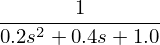

In [3]:
H = Num_s / Den_s
H

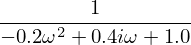

In [4]:
Hw = H.subs(s,w*1j)
Hw

Varios programas definen la función de transferencia únicamente a partir de los coeficientes $\alpha$ y $\beta$.Este es el caso del Toolbox [`scipy.signal`](http://docs.scipy.org/doc/scipy/reference/signal.html) para python donde se puede evaluar numéricamente $H(j \omega)$ en un conjunto de valores de frecuencia angular $\omega_i$ a partir de los coeficientes del modelo.

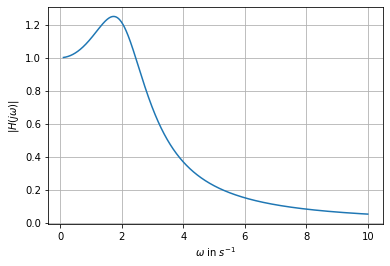

In [5]:
from scipy import signal

R = 1
L = 0.5
C = 0.4
beta = 1
alpha = L*C, R*C, 1

w, H = signal.freqresp((beta, alpha))

import matplotlib.pyplot as plt

plt.plot(w, abs(H))
plt.xlabel('$\omega$ in $s^{-1}$')
plt.ylabel('$|H(j \omega)|$')
plt.grid();

## Gráficas de Bode 

La función de transferencia en el dominio de Fourier caracteriza la transmisión de un sistema LTI con respecto a una señal armónica $e^{j \omega t}$ con frecuencia angular $\omega = 2 \pi f$.

A menudo se trabajan las funciones magnitud $| H(j \omega) |$ y fase $\varphi_H(j \omega)$ de forma separada.


\begin{align}
| Y(j \omega) | &= | X(j \omega) | \cdot | H(j \omega) | \\
\varphi_Y(j \omega) &= \varphi_X(j \omega) + \varphi_H(j \omega)
\end{align}

donde $X(j \omega)$ es la señal de entrada y $| X(j \omega) |$ and $\varphi_X(j \omega)$ su magnitud y fase, respectivamente.

Observe que $| H(j \omega) |$ muestra la atenuación o amplificación en función de la frecuencia $| X(j \omega) |$ de la señal de entrada. Por otra parte, $\varphi_H(j \omega)$ muestra la fase que se introduce en el sistema. 

Las [gráficas de Bode](https://en.wikipedia.org/wiki/Bode_plot) se usan para representar gráficamente las propiedades del sistema en términos de magnitud y fase en función de la frecuencia. Se trata de una gráfica logarítmica de la magnitud de la función de transferencia en [decibeles](https://en.wikipedia.org/wiki/Decibel)  $20 \log_{10} | H(j \omega) |$ contra el logaritmo de la frecuencia $\omega$ o $f$.

La fase $\varphi_H(j \omega)$ se grafica linealmente contra el logaritmo de la frecuencia.

Como $H(s)$ es racional respecto a $s$, se puede representar en términos de polos y ceros.

\begin{equation}
H(s) = K \cdot \frac{\prod_{\mu=1}^{M} (s - s_{0 \mu})}{\prod_{\nu=1}^{N} (s - s_{\infty \nu})}
\end{equation}

considerando que $s=j \omega$
\begin{equation}
H(j \omega) = K \cdot \frac{\prod_{\mu=1}^{M} (j \omega - s_{0 \mu})}{\prod_{\nu=1}^{N} (j \omega - s_{\infty \nu})}
\end{equation}

donde $s_{0 \mu}$ y $s_{\infty \nu}$ son el $\mu$-ecimo cero and $\nu$-ecimo polo de $H(s)$. El logaritmo de la magnitud y la fase son:

\begin{align}
\log_{10} | H(j \omega) | &= \sum_{\mu=0}^{M} \log_{10} |j \omega - s_{0 \mu}| - \sum_{\nu=0}^{N} \log_{10} |j \omega - s_{\infty \nu}| + \log_{10} |K|   \\
\varphi_H(j \omega) &= \sum_{\mu=0}^{M} \arg (j \omega - s_{0 \mu}) - \sum_{\nu=0}^{N} \arg (j \omega - s_{\infty \nu})
\end{align}

donde $\arg(\cdot)$ es el [argumento](https://en.wikipedia.org/wiki/Argument_%28complex_analysis%29) (fase) de una función compleja.

Los resultados anteriores permiten aproximar las gráficas de Bode a mano. Se recomienda revisar la [literatura](https://en.wikipedia.org/wiki/Bode_plot#Rules_for_handmade_Bode_plot).

**Ejemplo**

La gráfica de Bode del filtro anterior

La función de transferencia $H(j \omega)$ se obtiene a partir de $H(s)$ como

\begin{equation}
H(j \omega) = \frac{1}{C L s^2 + C R s + 1} \bigg\rvert_{s = j \omega}
\end{equation}

In [6]:
sym.solve(2*s**2 + 0.4*s + 2)

In [7]:
import numpy as np
np.sqrt(0.1*0.1+1)

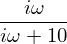

In [8]:
s = sym.symbols('s')
w = sym.symbols('omega', real=True)

R = 1
L = 0.5
C = 0.4

# Hs = 1/(C*L*s**2 + C*R*s + 1)
Hs = 1*(s)/((s+10))

H = Hs.subs(s, sym.I * w)
H



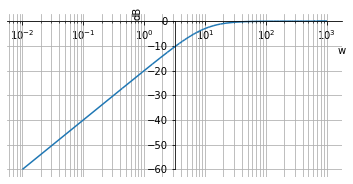

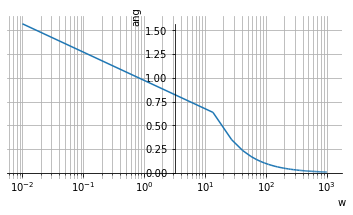

In [9]:
plt.rcParams['figure.figsize'] = 6, 3

logx_plot(db(H), (w, 0.01, 1000),
          xlabel='w', ylabel='dB')
logx_plot(sym.arg(H), (w, 0.01, 1000),
          xlabel='w', ylabel='ang')